### Computer Vision Internship Program



#### Practical Task description:
Your task is to write to a pipeline to classify images from MNIST dataset
(http://yann.lecun.com/exdb/mnist/)  using Neural Networks!



![alt text](mnist.png "Title")


##### To complete this task, you will have to implement the following steps:
<br> 1. Download and read the data - 10 points
<br> 2. Show how you use augmentation functions. To get the points, visualize the original image vs augmented image using 4 augmentation techniques of your choice - 10 points
<br> 3. Implement a Neural Network which classifies given images. You can use any deep learning framework - 10 points
<br> 4. Implement a training procedure using your dataloader, augmentation functions and neural network - 10 points
<br> 5. Plot loss graph - 10 points
<br> 6. Print accuracy of your model on test set -  10 points
<br> 7. Show us how your model works! Plot a few input images and corresponding predictions of your model - 10 points
<br> 8. Upload your work to github - 5 points. Google/dropbox/yandex drive - 0 points

Max = 75 points!

##### Main notes:
<br> *- implement your work in provided jupyter notebook 
<br> - you can use any framework 
<br> - we are not too strict about the requirements: if your work corresponds to the task wording, the chances are you will get the full points*


Please, upload to a google/dropbox/yandex drive or github  and send the link to the following google form: https://docs.google.com/forms/d/e/1FAIpQLSeeYILriugs1Vdxa3r01nS1469VT-_t_ZCNF18zwQVl-XKkHQ/viewform?usp=sf_link 

If you have any questions, please mail to:
olzhas.kabdolov@btsdigital.kz and rustem.burkhanov@btsdigital.kz 

**The deadline is 27th of May, 12 o'Clock in the noon**


####  Good luck and have fun!


##### Task 1. Dataloader

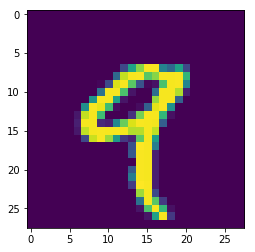

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns

#As it was requested, the MNIST dataset is manually downloaded, (not load_data()):
!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

%matplotlib inline

!gunzip t10k-images-idx3-ubyte.gz
!gunzip t10k-labels-idx1-ubyte.gz
!gunzip train-images-idx3-ubyte.gz
!gunzip train-labels-idx1-ubyte.gz

import idx2numpy

arr_train = idx2numpy.convert_from_file('train-images-idx3-ubyte')
arr_train_labels = idx2numpy.convert_from_file('train-labels-idx1-ubyte')
arr_test = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')
arr_test_labels = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')


from matplotlib import pyplot as plt
plt.imshow(arr_train[4], interpolation='nearest')
plt.show()

arr_train.flags.writeable = True
arr_train_labels.flags.writeable = True
arr_test.flags.writeable = True
arr_test_labels.flags.writeable = True




##### Task 2. Augmentation

(60000, 28, 28)
(120000, 28, 28)


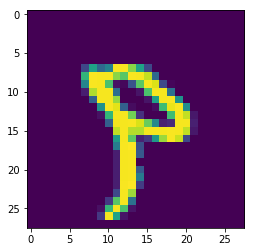

In [2]:

#Data Augmentation Technique #1: FLIP

arr_train_1 = []
arr_test_1= []

for i in range(0, 60000):
    arr_train_1.append(np.fliplr(arr_train[i]))

for i in range(0, 10000):
    arr_test_1.append(np.fliplr(arr_test[i]))
    
arr_train_1 = np.asarray(arr_train_1)
arr_train = np.concatenate((arr_train, arr_train_1))
arr_train_labels = np.concatenate((arr_train_labels, arr_train_labels))

arr_test_1 = np.asarray(arr_test_1)
arr_test = np.concatenate((arr_test, arr_test_1))
arr_test_labels = np.concatenate((arr_test_labels, arr_test_labels))

print(arr_train_1.shape)
print(arr_train.shape)

plt.imshow(arr_train_1[4], interpolation='nearest')
plt.show()

(60000, 28, 28)
(180000, 28, 28)


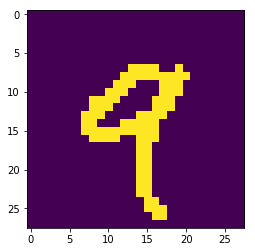

In [3]:
#Data Augmentation Technique #2: Benchmarking pixels

arr_train_2 = np.copy(arr_train[:60000])
arr_train_2[arr_train_2 >= 128] = 255
arr_train_2[arr_train_2 < 128] = 0

arr_test_2 = np.copy(arr_test[:10000])
arr_test_2[arr_test_2 >= 128] = 255
arr_test_2[arr_test_2 < 128] = 0

arr_train = np.concatenate((arr_train, arr_train_2))
arr_test = np.concatenate((arr_test, arr_test_2))

print(arr_train_2.shape)
print(arr_train.shape)

plt.imshow(arr_train_2[4], interpolation='nearest')
plt.show()

In [4]:
print(arr_train_labels.shape)
print(arr_test_labels.shape)


(120000,)
(20000,)


In [5]:
arr_train_labels = np.concatenate((arr_train_labels, arr_train_labels[:60000]))
arr_test_labels = np.concatenate((arr_test_labels, arr_test_labels[:10000]))

In [6]:
print(arr_train_labels.shape)
print(arr_test_labels.shape)
print(arr_train.shape)
print(arr_test.shape)


(180000,)
(30000,)
(180000, 28, 28)
(30000, 28, 28)


##### Task 3. Neural Network

In [7]:
!source activate myenv

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [8]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

x_train = arr_train
x_test = arr_test
y_train = arr_train_labels
y_test = arr_test_labels

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



Using plaidml.keras.backend backend.
INFO:plaidml:Opening device "metal_amd_radeon_pro_560.0"


x_train shape: (180000, 28, 28, 1)
180000 train samples
30000 test samples


##### Task 4. Train loop

In [9]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 180000 samples, validate on 30000 samples
Epoch 1/12
179840/180000 [============================>.] - ETA: 0s - loss: 0.2547 - acc: 0.9212

INFO:plaidml:Analyzing Ops: 85 of 286 operations complete


180000/180000 [==============================] - 57s 315us/step - loss: 0.2546 - acc: 0.9212 - val_loss: 0.0813 - val_acc: 0.9742
Epoch 2/12
180000/180000 [==============================] - 52s 286us/step - loss: 0.1060 - acc: 0.9685 - val_loss: 0.0554 - val_acc: 0.9816
Epoch 3/12
180000/180000 [==============================] - 52s 288us/step - loss: 0.0846 - acc: 0.9748 - val_loss: 0.0488 - val_acc: 0.9836
Epoch 4/12
180000/180000 [==============================] - 52s 287us/step - loss: 0.0733 - acc: 0.9780 - val_loss: 0.0509 - val_acc: 0.9841
Epoch 5/12
180000/180000 [==============================] - 53s 295us/step - loss: 0.0671 - acc: 0.9798 - val_loss: 0.0410 - val_acc: 0.9861
Epoch 6/12
180000/180000 [==============================] - 52s 291us/step - loss: 0.0638 - acc: 0.9807 - val_loss: 0.0398 - val_acc: 0.9875
Epoch 7/12
180000/180000 [==============================] - 52s 290us/step - loss: 0.0603 - acc: 0.9821 - val_loss: 0.0417 - val_acc: 0.9872
Epoch 8/12
180000/180000

##### Task 5. Loss plot

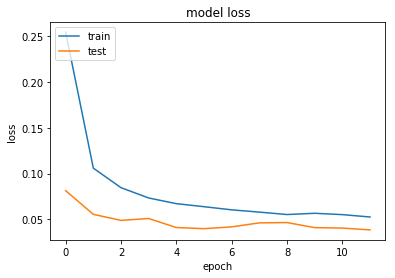

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Task 6. Test set accuracy

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.038394245247046155
Test accuracy: 0.9884


##### Task 7. Inference

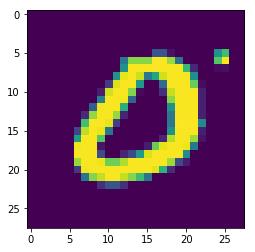

Prediction:  (array([0]),)


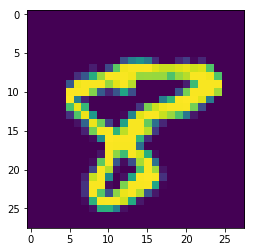

Prediction:  (array([8]),)


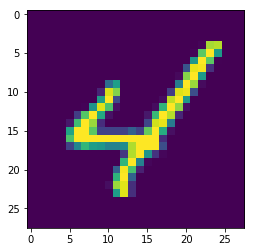

Prediction:  (array([4]),)


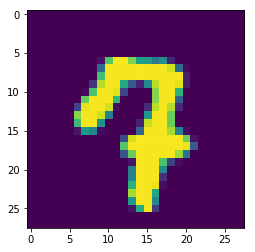

Prediction:  (array([7]),)


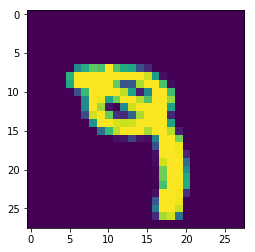

Prediction:  (array([9]),)


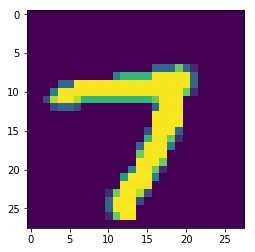

Prediction:  (array([7]),)


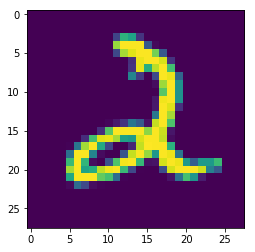

Prediction:  (array([2]),)


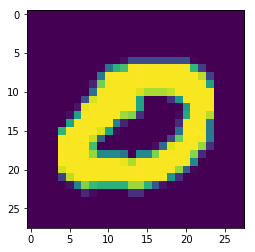

Prediction:  (array([0]),)


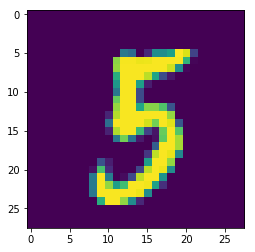

Prediction:  (array([5]),)


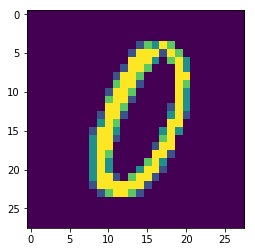

Prediction:  (array([0]),)


In [27]:
for i in range(10):
    a = np.random.randint(10000)
    plt.imshow(x_test[a].reshape(28,28), interpolation='nearest')
    plt.show()

    print("Prediction: ", np.where(max(model.predict(x_test[a].reshape(1,28,28,1))) == np.amax(max(model.predict(x_test[a].reshape(1,28,28,1))))))